<a href="https://colab.research.google.com/github/gaurav21s/Image-Recognition-Project/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_dir = r'/content/drive/MyDrive/train'
validation_dir = r'/content/drive/MyDrive/validation'
test_dir =r'/content/drive/MyDrive/test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.3,
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

219070464/219055592 [==============================] - 2s 0us/step


In [7]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3539200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [10]:
conv_base.trainable = False

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5", save_best_only=True)

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

Epoch 1/5
100/100 [==============================] - 1084s 11s/step - loss: 0.1535 - acc: 0.9395 - val_loss: 0.0745 - val_acc: 0.9680
Epoch 2/5
100/100 [==============================] - 32s 315ms/step - loss: 0.1611 - acc: 0.9335 - val_loss: 0.0718 - val_acc: 0.9690
Epoch 3/5
100/100 [==============================] - 32s 315ms/step - loss: 0.1627 - acc: 0.9350 - val_loss: 0.0675 - val_acc: 0.9690
Epoch 4/5
100/100 [==============================] - 32s 315ms/step - loss: 0.1389 - acc: 0.9430 - val_loss: 0.0620 - val_acc: 0.9740
Epoch 5/5
100/100 [==============================] - 32s 315ms/step - loss: 0.1145 - acc: 0.9485 - val_loss: 0.0744 - val_acc: 0.9760


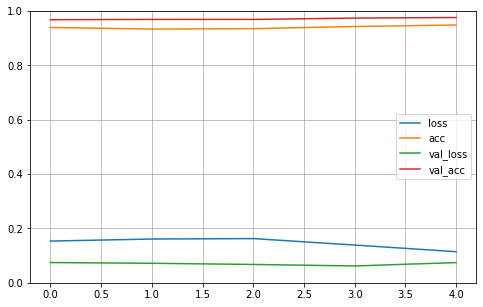

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 531s 11s/step - loss: 0.0939 - acc: 0.9680


[0.0939164087176323, 0.9679999947547913]